In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from modules.linear import *
from modules.loss import *
from modules.activation import *
from modules.sequential import *
from tests.test_linear import *
from tests.test_activation import *


TestLinear().test_gradient(atol=1e-3, n_iter=25)
TestActivation().test_gradient_tanh(atol =1e-5, n_iter=25)
TestActivation().test_gradient_sigmoid(atol =1e-5, n_iter=25)


100%|██████████| 25/25 [00:00<00:00, 405.59it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 454.33it/s]


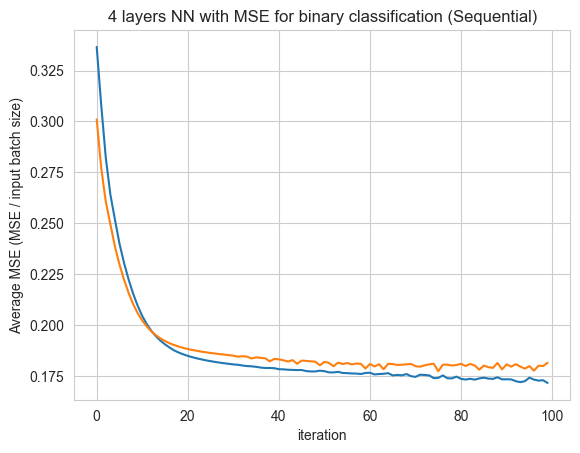

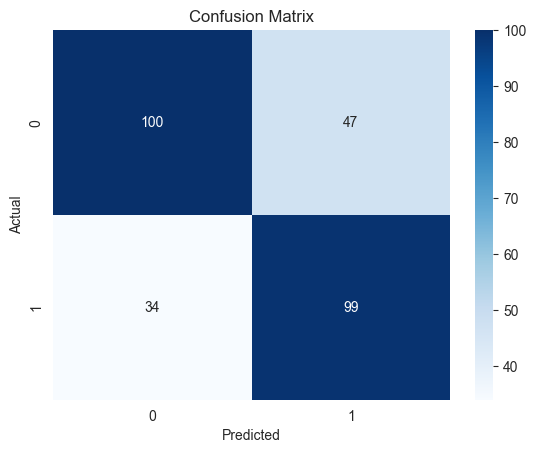

              precision    recall  f1-score   support

        dots       0.75      0.68      0.71       147
       lines       0.68      0.74      0.71       133

    accuracy                           0.71       280
   macro avg       0.71      0.71      0.71       280
weighted avg       0.71      0.71      0.71       280



In [7]:

eps = 1e-3
n_iter = 100
data = sns.load_dataset("dots")
data["y"] = (data["align"] == "dots").astype(int)
data = data.drop(columns=["align","choice"])
X = data.drop(columns="y").values
y = data["y"].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
batch,input, inter1, inter2, inter3, output = X_train.shape[0], X_train.shape[1], 10, 16, 5, 1

L1 = Linear(input, inter1)
L2 = Linear(inter1, inter2)
L3 = Linear(inter2, inter3)
L4 = Linear(inter3, output)
Tanh = TanH()
Sig = Sigmoid()
loss_module = MSELoss()

sequential = Sequential([L1, Tanh, L2, Tanh, L3, Tanh, L4, Sig])
loss_list = []
test_loss_list = []
for i in tqdm(range(n_iter)):
	z = sequential.forward(X_train)
	loss = loss_module.forward(y_train, z)
	loss_list.append(sum(loss)/X_train.shape[0])
	delta = loss_module.backward(y_train, z)
	sequential.backward(X_train, delta)
	sequential.update_parameters(eps)
	sequential.zero_grad()
	test_loss = loss_module.forward(y_test, sequential.forward(X_test))
	test_loss_list.append(sum(test_loss)/X_test.shape[0])

plt.plot(range(n_iter), (loss_list),label="train MSE")
plt.plot(range(n_iter), (test_loss_list),label="test MSE")
plt.title("4 layers NN with MSE for binary classification (Sequential)") 
plt.xlabel("iteration")
plt.ylabel("Average MSE (MSE / input batch size)")
plt.show()

y_pred = sequential.forward(X_test)
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, y_pred, target_names=["dots", "lines"]))


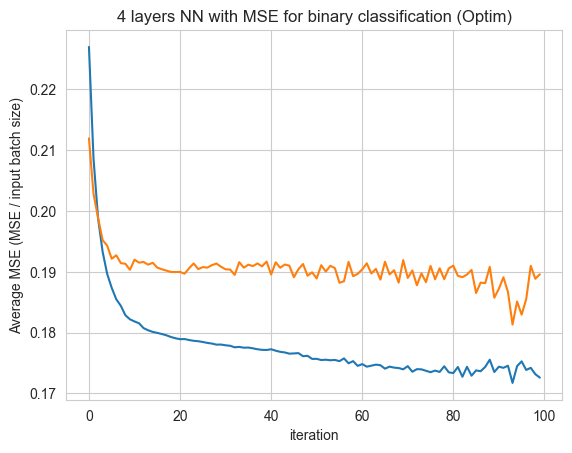

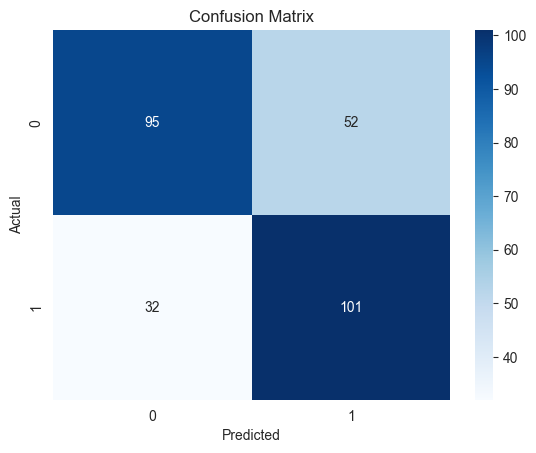

              precision    recall  f1-score   support

        dots       0.75      0.65      0.69       147
       lines       0.66      0.76      0.71       133

    accuracy                           0.70       280
   macro avg       0.70      0.70      0.70       280
weighted avg       0.71      0.70      0.70       280



In [8]:
eps = 1e-3
n_iter = 100
batch,input, inter1, inter2, inter3, output = X_train.shape[0], X_train.shape[1], 10, 24, 10, 1

L1 = Linear(input, inter1)
L2 = Linear(inter1, inter2)
L3 = Linear(inter2, inter3)
L4 = Linear(inter3, output)
Tanh = TanH()
Sig = Sigmoid()
loss_module = MSELoss()

sequentiel = Sequential([L1, Tanh, L2, Tanh, L3, Tanh, L4, Sig])

loss_list = []
test_loss_list = []
loss = MSELoss()
optim = Optim(sequentiel, loss,eps)
for _ in range(n_iter):
	loss_value = sum(optim.step(X_train,y_train))/X_train.shape[0]
	loss_list.append(loss_value)
	test_loss_value = sum(optim.test(X_test,y_test)[0])/X_test.shape[0]
	test_loss_list.append(test_loss_value)

plt.plot(range(n_iter), loss_list, label="train MSE")
plt.plot(range(n_iter), test_loss_list,label="test MSE")
plt.title("4 layers NN with MSE for binary classification (Optim)") 
plt.xlabel("iteration")
plt.ylabel("Average MSE (MSE / input batch size)")
plt.show()

y_pred = optim.test(X_test,y_test)[1]
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, y_pred, target_names=["dots", "lines"]))